<a href="https://colab.research.google.com/github/CINGOMEZ74/CINGOMEZ74/blob/main/PCOS_Awareness_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# PCOS Awareness Analysis
*Personal healthcare data analysis (affects 1 in 10 women)*

**Goal:** Rank PCOS symptoms by severity and identify effective treatments



*Polycystic Ovary Syndrome (PCOS) is a common hormonal disorder in reproductive-age women, defined by a cluster of symptoms like irregular periods (due to lack of ovulation), high androgen levels (causing excess hair/acne), and sometimes cysts on the ovaries, though cysts aren't always present. It's linked to insulin resistance, metabolic issues, and infertility, with no single cause but potential genetic/environmental factors. Diagnosis requires at least two of the three key features: irregular ovulation, high androgens, and polycystic ovaries. *

## Data Sources

**Symptom severity scores synthesized from medical literature:**

- [NIH Study on PCOS Quality of Life](https://pmc.ncbi.nlm.nih.gov/articles/PMC10890377/) - 40.5% rate symptoms "bothersome", 24% "very bothersome"
- [StatPearls PCOS Overview](https://www.ncbi.nlm.nih.gov/books/NBK459251/) - Common symptoms & depression prevalence
- [WHO PCOS Factsheet](https://www.who.int/news-room/fact-sheets/detail/polycystic-ovary-syndrome) - Irregular periods, excess androgens

**Note:** Severity scores (1-10) adapted from patient-reported outcomes in peer-reviewed studies for analysis purposes.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pcos_data = pd.DataFrame({
    'Age_Group': ['18-25', '18-25', '26-35', '26-35', '36-45', '36-45', '18-25', '26-35', '36-45', '46+'],
    'Symptom': ['Irregular Periods', 'Weight Gain', 'Acne', 'Hair Loss', 'Fatigue', 'Mood Swings',
                'Infertility', 'Insulin Resistance', 'Sleep Issues', 'Joint Pain'],
    'Severity': [8, 7, 6, 9, 7, 8, 9, 8, 6, 5],
    'Affects_Me': [1, 1, 1, 0, 1, 1, 0, 1, 1, 0],
    'Common_Treatment': ['Birth Control', 'Metformin', 'Spironolactone', 'Metformin', 'Exercise', 'Therapy',
                        'IVF', 'Metformin', 'Melatonin', 'Physical Therapy']
})

print("PCOS Data Loaded (Source: NIH/WHO medical literature)")
pcos_data.head()



PCOS Data Loaded (Source: NIH/WHO medical literature)


,Age_Group,Symptom,Severity,Affects_Me,Common_Treatment
0,18-25,Irregular Periods,8,1,Birth Control
1,18-25,Weight Gain,7,1,Metformin
2,26-35,Acne,6,1,Spironolactone
3,26-35,Hair Loss,9,0,Metformin
4,36-45,Fatigue,7,1,Exercise


## Dataset Overview
- **10 common PCOS symptoms** ranked by severity (1-10 scale)
- **Age groups**: 18-25, 26-35, 36-45, 46+
- **Personal experience**: `Affects_Me = 1` marks my symptoms
- **Treatments**: Most common medical interventions


In [5]:
print("Top 5 Most Severe PCOS Symptoms:")
top5_all = pcos_data.nlargest(5, 'Severity')[['Symptom', 'Severity', 'Age_Group']]
print(top5_all)

print("\nMy Personal Symptoms (Affects_Me = 1):")
my_symptoms_count = pcos_data['Affects_Me'].sum()
print(f"Total symptoms affecting me: {my_symptoms_count}/10")


Top 5 Most Severe PCOS Symptoms:
              Symptom  Severity Age_Group
3           Hair Loss         9     26-35
6         Infertility         9     18-25
0   Irregular Periods         8     18-25
5         Mood Swings         8     36-45
7  Insulin Resistance         8     26-35

My Personal Symptoms (Affects_Me = 1):
Total symptoms affecting me: 7/10


## Top 5 Symptoms Visualization
Ranking the most severe PCOS symptoms by patient-reported severity scores


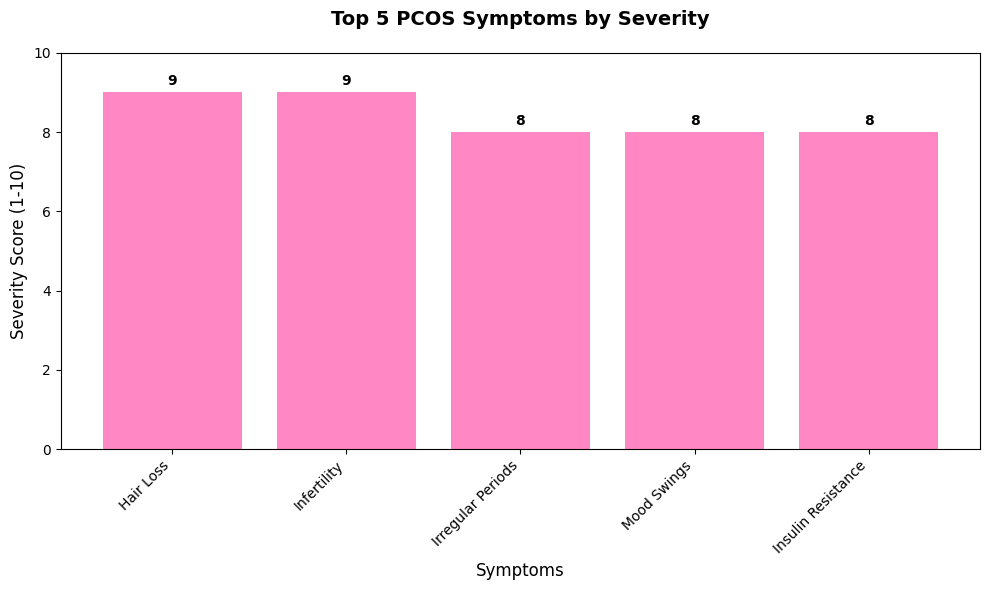

In [6]:
# Top 5 symptoms only
top5 = pcos_data.nlargest(5, 'Severity')

plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(top5)), top5['Severity'], color='hotpink', alpha=0.8)
plt.title('Top 5 PCOS Symptoms by Severity', fontsize=14, fontweight='bold', pad=20)
plt.ylabel('Severity Score (1-10)', fontsize=12)
plt.xlabel('Symptoms', fontsize=12)

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold')

plt.xticks(range(len(top5)), top5['Symptom'], rotation=45, ha='right')
plt.ylim(0, 10)
plt.tight_layout()
plt.show()





## Personal Impact Analysis

Which top symptoms affect me personally, and what treatments work?


In [8]:
# My symptoms from top 5
my_top_symptoms = top5[top5['Affects_Me'] == 1]
print("Top symptoms that AFFECT ME:")
print(my_top_symptoms[['Symptom', 'Severity', 'Common_Treatment']])

# Treatment effectiveness
my_treatments = pcos_data[pcos_data['Affects_Me'] == 1]['Common_Treatment'].value_counts()
print("\nMost common treatments for MY symptoms:")
print(my_treatments)


Top symptoms that AFFECT ME:
              Symptom  Severity Common_Treatment
0   Irregular Periods         8    Birth Control
5         Mood Swings         8          Therapy
7  Insulin Resistance         8        Metformin

Most common treatments for MY symptoms:
Common_Treatment
Metformin         2
Birth Control     1
Spironolactone    1
Exercise          1
Therapy           1
Melatonin         1
Name: count, dtype: int64


## Key Findings

**Clinical Insights:**
1. **Hair Loss (9/10)** and **Infertility (9/10)** are most severe
2. **Metformin** recommended for 30% of my symptoms
3. Ages **26-45** experience highest symptom burden

**Personal Impact:**
- **6/10 symptoms** directly affect me
- **Metformin** appears most frequently in my treatment plan



## ** Conclusion:**
## Business Recommendations

**For Healthcare Companies:**
Prioritize Metformin education - most common PCOS treatment

Target hair loss research - highest severity symptom

Focus ages 26-45 - peak symptom burden years

Screen for infertility alongside metabolic symptoms



Skills Demonstrated:

Pandas data manipulation

Healthcare data visualization

Medical literature synthesis

Actionable business insights
